## Boston Entertainment License Analysis

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd

# Import Graphics Libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
import seaborn.matrix as smatrix
sns.set(style="ticks")

# Import Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Enable inline display of graphics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

#### Import Data set
I accessed a public data set from data.boston.gov available at this website: https://data.boston.gov/dataset/. 
I have 3682 rows and 28 columns in the dataset.

In [2]:
filename = "https://data.boston.gov/dataset/0d93d762-da11-4cea-9bf0-77aaa5d25c36/resource/7920c501-b410-4a9c-85ab-51338c9b34af/download/entertainment-licenses.csv"
# headers = ["symboling","normalized-losses","make"]
df = pd.read_csv(filename,header=0,mangle_dupe_cols=True,skip_blank_lines=True,dtype ='unicode',parse_dates=True)

#### First Three Rows of Boston Entertainment License Data Set



In [3]:
df.head(n = 3)

,LICENSENO,LICENSEDTTM,ISSDTTM,EXPDTTM,LICSTATUS,LICCATDESC,PRIMAPPLICANT,CONTACT,DBANAME,BUSINESSNAME,...,CAL_UNITTYPECODE,UnitTypeDescript,TotalEntCapacity,STNO,STNOHI,Address,CITY,STATE,ZIP,Location
0,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,WidescrnTV,Widescreen Television,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
1,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,Radio,Radio,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
2,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,CassetteCD,Cassette/CD Player,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"


#### Data Cleaning

Data cleaning is the process of preparing data for analysis by removing or modifying data set which has incorrect, incomplete or outliers. Data cleaning is not simply about deleting information to make space for new data, but rather finding a way to maximize a data set’s quality without necessarily deleting the information. Based on number of nulls or being redundant the following columns are dropped:

<li> Identify how many rows and columns are we dealing with.</li>



In [4]:
df = df[df['LICCATDESC']!='Night Club']  # just comparing two types of entertainment business....

In [5]:
print("The dimensions of the food inspection data set are: {}".format(df.shape))
print("The size of the food inspection data set is : {} " .format(df.size))
Data1=df.astype('category')


The dimensions of the food inspection data set are: (3682, 28)
The size of the food inspection data set is : 103096 


In [6]:
Data1.describe()

,LICENSENO,LICENSEDTTM,ISSDTTM,EXPDTTM,LICSTATUS,LICCATDESC,PRIMAPPLICANT,CONTACT,DBANAME,BUSINESSNAME,...,CAL_UNITTYPECODE,UnitTypeDescript,TotalEntCapacity,STNO,STNOHI,Address,CITY,STATE,ZIP,Location
count,3682,3674,3678,3678,3682,3682,3682,459,3682,3680,...,3681,3681,3682,3634,1381,3682,3682,3682,3682,3142
unique,1117,89,33,3,1,2,967,119,1033,1003,...,22,22,331,606,319,311,19,3,31,880
top,CAL-132529,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Mary Her,RICCIO,Boloco,"Legal Sea Foods, LLC",...,CassetteCD,Cassette/CD Player,49,1,112,Washington ST,Boston,MA,2116,"(42.357360000, -71.052010000)"
freq,11,3404,3611,3469,3682,2513,24,14,21,37,...,796,796,96,100,26,194,2063,3667,431,18


#### Percent of Column Values Missing
<li> The dataset has some missing records </li>



In [7]:
missing_data = df.isnull()
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
print(missing_data)


                        Total    Percent
CONTACT                  3223  87.533949
STNOHI                   2301  62.493210
Location                  540  14.665942
ENDTIME                   108   2.933188
STNO                       48   1.303639
LICENSEDTTM                 8   0.217273
ISSDTTM                     4   0.108637
EXPDTTM                     4   0.108637
Manager                     3   0.081477
BUSINESSNAME                2   0.054318
CAL_UNITTYPECODE            1   0.027159
FEEAMOUNT                   1   0.027159
UnitTypeDescript            1   0.027159
LICCATDESC                  0   0.000000
PRIMAPPLICANT               0   0.000000
LICSTATUS                   0   0.000000
DBANAME                     0   0.000000
CAPACITY                    0   0.000000
TOTALCAPACITY               0   0.000000
ZIP                         0   0.000000
NUMBEROFUNITS               0   0.000000
Neighborhood                0   0.000000
CAL_POLICEDISTRICTCODE      0   0.000000
TotalEntCapacity

#### Visualizing missing data
The below heatmap shows the density of missing data for each column.

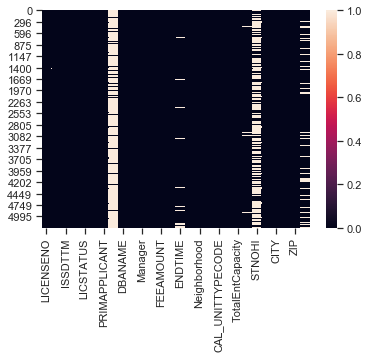

In [8]:
sns.heatmap(df.isnull())

#### Dropping columns
    which have missing data of more than 40%, also to make it consice i am renaming some columns.

In [9]:
df = df.drop(columns = ['DBANAME', 'CONTACT','STATE','STNOHI','Address','Location'])   
df.rename(columns = {'city': 'neighborhood'}, inplace = True)
print(list(df))

['LICENSENO', 'LICENSEDTTM', 'ISSDTTM', 'EXPDTTM', 'LICSTATUS', 'LICCATDESC', 'PRIMAPPLICANT', 'BUSINESSNAME', 'Manager', 'TOTALCAPACITY', 'FEEAMOUNT', 'CAPACITY', 'ENDTIME', 'NUMBEROFUNITS', 'Neighborhood', 'CAL_POLICEDISTRICTCODE', 'CAL_UNITTYPECODE', 'UnitTypeDescript', 'TotalEntCapacity', 'STNO', 'CITY', 'ZIP']


#### There is only one row with no business name in it, we will remove that row

In [10]:
df = df.dropna(subset=['BUSINESSNAME'])
len(df)

3680

#### Converting to Lower case, datetime and Integer

In [11]:
df["BUSINESSNAME"] = df['BUSINESSNAME'].str.lower()

In [12]:
df['LICENSEDTTM'] = pd.to_datetime(df['LICENSEDTTM'])

In [13]:
# converting total capacity to Integer
df['TOTALCAPACITY'] = df['TOTALCAPACITY'].astype(int)
df['FEEAMOUNT'] = df['FEEAMOUNT'].astype(float)

#### Exploratory Data Analysis and Discussion

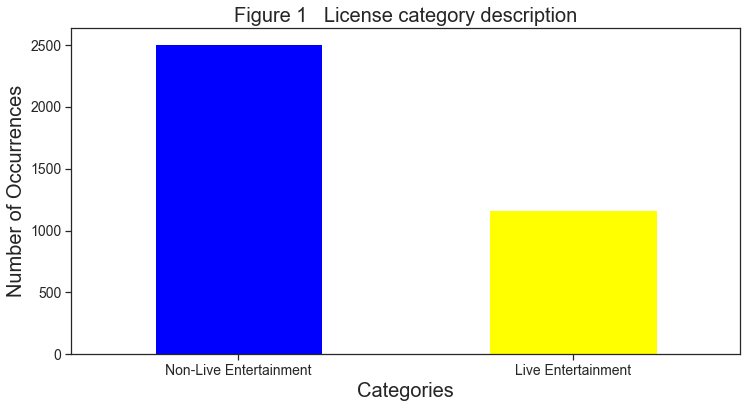

In [14]:
ax = df['LICCATDESC'].value_counts().head(3).plot.bar(

    figsize = (12,6),
    fontsize = 14,
    color={"blue","gray","yellow"},
    rot=0
)
ax.set_title("Figure 1   License category description", fontsize = 20)
ax.set_xlabel("Categories", fontsize = 20)
ax.set_ylabel("Number of Occurrences", fontsize = 20)
plt.show()

#### 1. Most frequent facilities provided by Entertainment Business

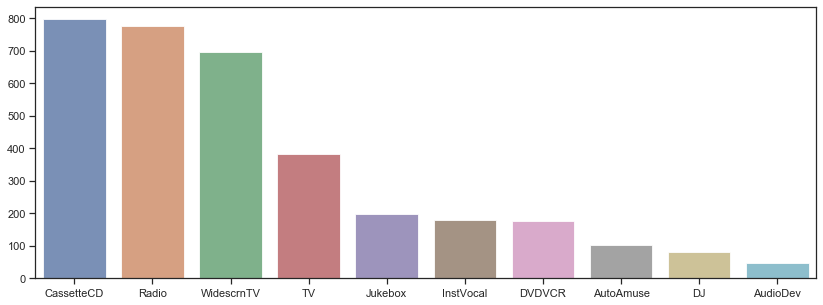

In [15]:

result_count  = df['CAL_UNITTYPECODE'].value_counts()
result_count = result_count[:10,]
plt.figure(figsize=(14,5))
sns.barplot(result_count.index, result_count.values, alpha=0.8)

plt.show()

In [16]:
capacity = df[['BUSINESSNAME','TOTALCAPACITY']].groupby('BUSINESSNAME')['TOTALCAPACITY'].mean().round(decimals=0).reset_index().sort_values('TOTALCAPACITY', ascending=False)

#### 2.Top Businesses in relation with their capacity

[(0, 10)]

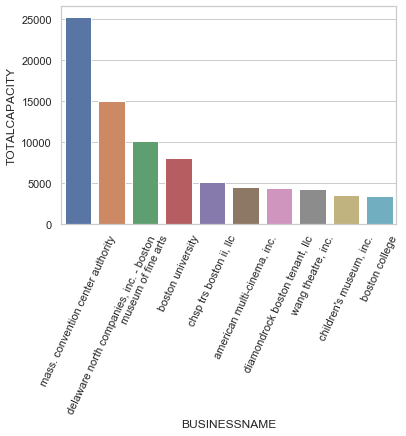

<Figure size 1440x720 with 0 Axes>

In [50]:
sns.barplot(x='BUSINESSNAME', y='TOTALCAPACITY', data=capacity.head(10))
plt.xticks(rotation=65)
plt.figure(figsize = (20,10))
ax.set(xlim=(0, 10))

In [18]:
endtime = df['ENDTIME'].value_counts()
endtime

2:00 AM           1192
1:00 AM            929
11:00 PM           408
12:00 AM           378
10:00 PM           115
02:00am             68
11:30 PM            40
9:00 PM             38
12:30 AM            33
8:00 PM             27
01:00am             27
7:00 PM             26
10:30 PM            21
see below           17
10:00pm             16
11:00pm             16
1:30 AM             16
SEE BELOW           14
2:00am              13
4:00 PM             12
6:00 PM              9
11:00PM              8
12:30am              8
10:00PM              7
1:00am               7
See Conditions       7
2:00AM               7
2:00 AM*             7
12:00am              6
5:00 PM              6
                  ... 
1:00AM               5
10:30pm              4
01:00am*             4
1:30am               4
24 Hours             4
See below            4
01:00AM              4
11:30 PM*            4
9:00PM               3
12:00AM              3
7:00PM               3
**                   3
8:00PM     

In [19]:
# Number of Violations per Restaurant, by Neighborhood
hood = df.groupby('Neighborhood')['LICENSENO'].nunique().sort_values(ascending = False)
hood = pd.DataFrame({'Neighborhood':hood.index, 'BusinessCount':hood.values})
hood.head(n=10)

,Neighborhood,BusinessCount
0,Downtown/Charlestown/North End,368
1,Back Bay/South End,264
2,Allston/Brighton,125
3,East Boston,102
4,South Boston,86
5,West Roxbury/Roslindale,40
6,Dorchester,40
7,Jamaica Plain,38
8,Roxbury/Dorchester,25
9,Hyde Park,15


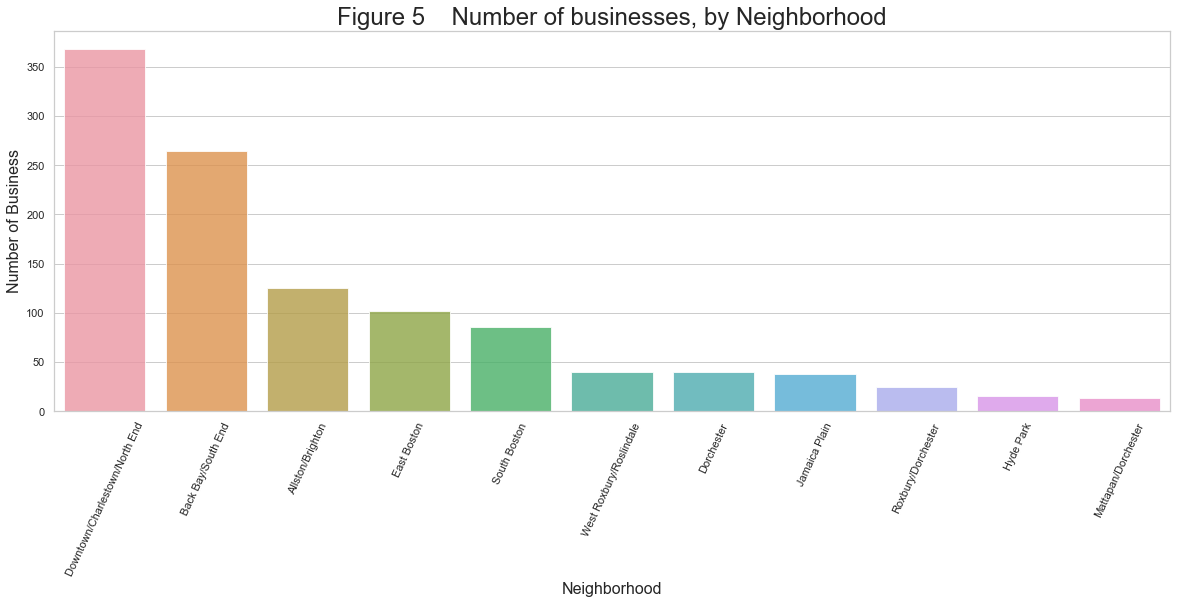

In [40]:

plt.figure(figsize=(20,7))
sns.barplot(hood.Neighborhood, hood.BusinessCount, alpha=0.8)
plt.title('Figure 5    Number of businesses, by Neighborhood', fontsize = 24)
plt.ylabel('Number of Business',fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=65)
plt.show()

In [21]:
A = df[df["LICCATDESC"] == "Non-Live Entertainment"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
NLE = np.log(A)
B = df[df["LICCATDESC"] == "Night Club"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
NC = np.log(B)
C = df[df["LICCATDESC"] ==  "Live Entertainment"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
LE = np.log(C)

#### License distribution

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


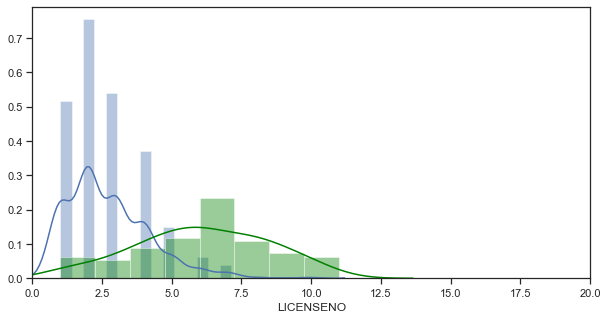

In [22]:
# Raw distribution of counts is highly skewed 
plt.figure(figsize=(10,5))
plt.xlim(0,20)
sns.distplot(A)
sns.distplot(B, color='red')
sns.distplot(C, color='green')
plt.show()

In [23]:
L_count = pd.DataFrame(df.groupby(df.LICENSEDTTM.dt.year)['LICENSENO'].count())

In [24]:
L_count.colunms = (['Year', 'Licenses Provided'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
L_count = L_count.reset_index()

In [26]:
L_count

,LICENSEDTTM,LICENSENO
0,2013.0,23
1,2014.0,3633
2,2015.0,16


### costly business

In [27]:
#BUSINESSNAME FEEAMOUNT
costly_bus = df[['BUSINESSNAME', 'FEEAMOUNT']].groupby('BUSINESSNAME')['FEEAMOUNT'].mean().reset_index().sort_values('FEEAMOUNT', ascending=False).head(10)
cheap_bus = df[['BUSINESSNAME', 'FEEAMOUNT']].groupby('BUSINESSNAME')['FEEAMOUNT'].mean().reset_index().sort_values('FEEAMOUNT', ascending=True).head(10)

In [28]:
costly_bus

,BUSINESSNAME,FEEAMOUNT
282,"delaware north companies, inc. - boston",5577.142857
762,rowes wharf limited partnership,4912.000000
732,"regal cinema's, inc.",2773.333333
358,"first boston tenpin, inc.",2692.000000
61,"american multi-cinema, inc.",2268.000000
623,new england conservatory of music,1600.000000
813,"south boston candlepins, inc.",1420.000000
736,"remy's fenway group, llc",1402.857143
296,do re mi studios,1346.666667
873,"tavern in the square causeway street, llc",1320.000000


#### Costly business by Fees charged per person.

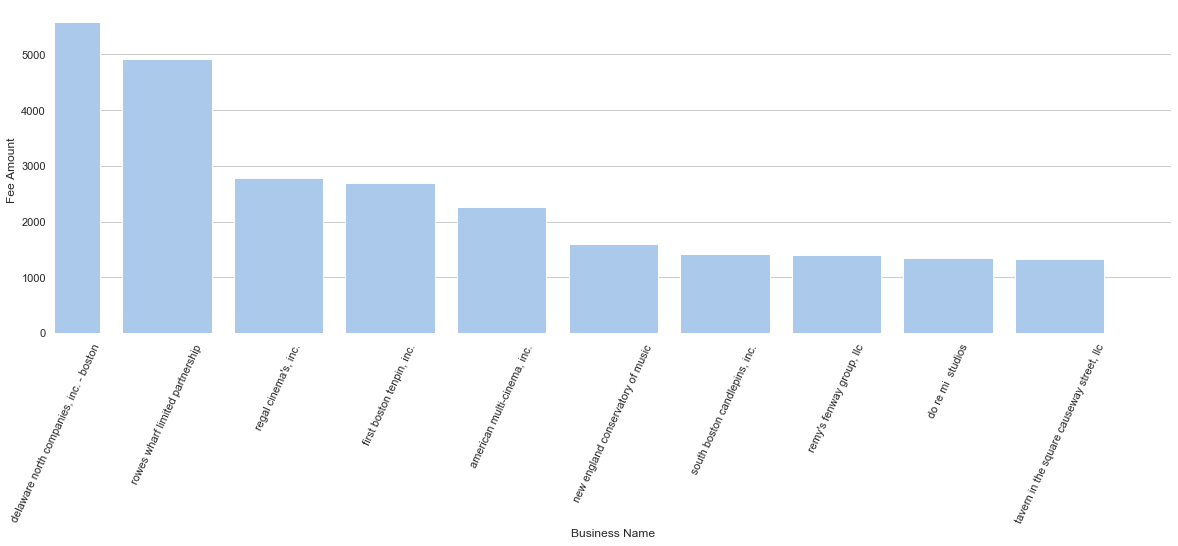

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x="BUSINESSNAME", y="FEEAMOUNT", data=costly_bus,
            label="Costly Businesses", color="b")
plt.xticks(rotation=65)
ax.set(xlim=(0, 10), ylabel="Fee Amount",
       xlabel="Business Name")
sns.despine(left=True, bottom=True)

### Machine Learning

As the target variable is category of license of live and non live entertainment so i have preferred classification Machine Learning Algorithm
Logistic Classification: Divide dataset into test and train and then use logistic to classify if business will be assigned license or not.

In [30]:
df1 = df.replace(('Non-Live Entertainment', 'Live Entertainment'), (1,0))
df1.LICCATDESC.value_counts()

1    2511
0    1169
Name: LICCATDESC, dtype: int64

In [31]:
#CAL_UNITTYPECODE
cat_vars=['Neighborhood','CAL_UNITTYPECODE']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    df1=df1.join(cat_list)
    data=df1
cat_vars=['Neighborhood','CAL_UNITTYPECODE']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [32]:
data['FEEAMOUNT'] = data['FEEAMOUNT'].round(0)

In [33]:
list(data.columns)

['LICENSENO',
 'LICENSEDTTM',
 'ISSDTTM',
 'EXPDTTM',
 'LICSTATUS',
 'LICCATDESC',
 'PRIMAPPLICANT',
 'BUSINESSNAME',
 'Manager',
 'TOTALCAPACITY',
 'FEEAMOUNT',
 'CAPACITY',
 'ENDTIME',
 'NUMBEROFUNITS',
 'Neighborhood',
 'CAL_POLICEDISTRICTCODE',
 'CAL_UNITTYPECODE',
 'UnitTypeDescript',
 'TotalEntCapacity',
 'STNO',
 'CITY',
 'ZIP',
 'Neighborhood_Allston/Brighton',
 'Neighborhood_Back Bay/South End',
 'Neighborhood_Dorchester',
 'Neighborhood_Downtown/Charlestown/North End',
 'Neighborhood_East Boston',
 'Neighborhood_Hyde Park',
 'Neighborhood_Jamaica Plain',
 'Neighborhood_Mattapan/Dorchester',
 'Neighborhood_Roxbury/Dorchester',
 'Neighborhood_South Boston',
 'Neighborhood_West Roxbury/Roslindale',
 'CAL_UNITTYPECODE_AudioDev',
 'CAL_UNITTYPECODE_AutoAmuse',
 'CAL_UNITTYPECODE_CassetteCD',
 'CAL_UNITTYPECODE_Concert',
 'CAL_UNITTYPECODE_DJ',
 'CAL_UNITTYPECODE_DVDVCR',
 'CAL_UNITTYPECODE_DancingPat',
 'CAL_UNITTYPECODE_Dartboard',
 'CAL_UNITTYPECODE_ExhibTrade',
 'CAL_UNITTYPECO

In [34]:
data_final=data[['TOTALCAPACITY','FEEAMOUNT','Neighborhood_Allston/Brighton',
 'Neighborhood_Back Bay/South End',
 'Neighborhood_Dorchester',
 'Neighborhood_Downtown/Charlestown/North End',
 'Neighborhood_East Boston',
 'Neighborhood_Hyde Park',
 'Neighborhood_Jamaica Plain',
 'Neighborhood_Mattapan/Dorchester',
 'Neighborhood_Roxbury/Dorchester',
 'Neighborhood_South Boston',
 'Neighborhood_West Roxbury/Roslindale',
 'CAL_UNITTYPECODE_AudioDev',
 'CAL_UNITTYPECODE_AutoAmuse',
 'CAL_UNITTYPECODE_CassetteCD',
 'CAL_UNITTYPECODE_Concert',
 'CAL_UNITTYPECODE_DJ',
 'CAL_UNITTYPECODE_DVDVCR',
 'CAL_UNITTYPECODE_DancingPat',
 'CAL_UNITTYPECODE_Dartboard',
 'CAL_UNITTYPECODE_ExhibTrade',
 'CAL_UNITTYPECODE_FloorShow',
 'CAL_UNITTYPECODE_InstVocal',
 'CAL_UNITTYPECODE_Jukebox',
 'CAL_UNITTYPECODE_Karaoke',
 'CAL_UNITTYPECODE_MoviePic',
 'CAL_UNITTYPECODE_PedalBoat',
 'CAL_UNITTYPECODE_Radio',
 'CAL_UNITTYPECODE_Skating',
 'CAL_UNITTYPECODE_Sporting',
 'CAL_UNITTYPECODE_TV',
 'CAL_UNITTYPECODE_Theatre',
 'CAL_UNITTYPECODE_Trivia',
 'CAL_UNITTYPECODE_WidescrnTV','LICCATDESC']]
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 5222
Data columns (total 36 columns):
TOTALCAPACITY                                  3680 non-null int32
FEEAMOUNT                                      3679 non-null float64
Neighborhood_Allston/Brighton                  3680 non-null uint8
Neighborhood_Back Bay/South End                3680 non-null uint8
Neighborhood_Dorchester                        3680 non-null uint8
Neighborhood_Downtown/Charlestown/North End    3680 non-null uint8
Neighborhood_East Boston                       3680 non-null uint8
Neighborhood_Hyde Park                         3680 non-null uint8
Neighborhood_Jamaica Plain                     3680 non-null uint8
Neighborhood_Mattapan/Dorchester               3680 non-null uint8
Neighborhood_Roxbury/Dorchester                3680 non-null uint8
Neighborhood_South Boston                      3680 non-null uint8
Neighborhood_West Roxbury/Roslindale           3680 non-null uint8
CAL_UNITTYPECODE_Aud

In [35]:
data_final.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [36]:
X = data_final.loc[:, data_final.columns != 'LICCATDESC']
Y = data_final.loc[:, data_final.columns == 'LICCATDESC']

# Create test set as 30% of dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Run Logistic Regression Model

logreg = LogisticRegression()
x=logreg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Calculate accuracy of model
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [38]:
# Calculate precision, recall, f1-score and support as performance metrics of model.
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.41      0.53       353
           1       0.77      0.95      0.85       751

    accuracy                           0.77      1104
   macro avg       0.78      0.68      0.69      1104
weighted avg       0.78      0.77      0.75      1104



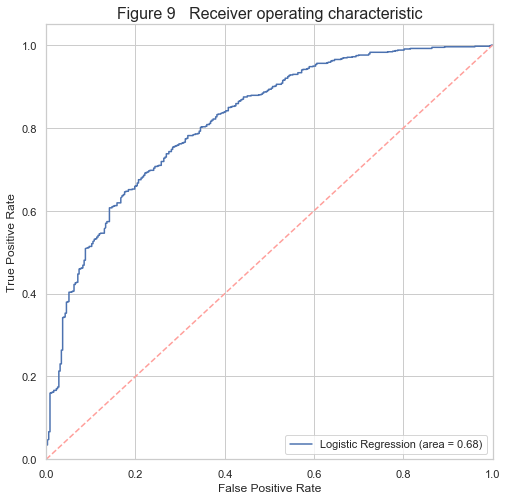

In [39]:
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Figure 9   Receiver operating characteristic', fontsize = 16)
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Conclusion

<ol>
    <li>It is observed that council has issued Non-live Entertainment License, double the number of live Entertainment License.
They have also issued more licenses in Downtown, Backbay and Allston.
There are also some top businesses in the city which are expensive such as Delaware North, Rowes wharf, Regal cinemas, First boston, american multi cinema. </li><li>Logistic Regression helps us predict if the business is given Live-Entertainment or Non Live Entertainment License. </li>
    <li> 
    The accuracy of model is 77%. </li>
<p>This dataset helped me understand how the licenses were issued and also what are the factors on which they get live/ non live entertainment license for a year!!
    
Predicting Failed Inspections with Logistic Regression
The first iteration predicting failed inspections using logistic regression gave gave a little predictive lift. This model can likely be significantly improved by including different or additional columns as predictors.
</ol>
